In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.utils.preprocessing import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
#Loading input and output data
df_input = pd.read_excel('../../data/data.xlsx') 
#df = df.drop(df.columns[0], axis=1)
df_output= data = pd.read_excel('../../data/data.xlsx', sheet_name="output")

In [5]:
# Get the first few column values 
df=pd.concat([df_input,df_output.drop('ID', axis=1)], axis=1)
df.head()

,ID,in_0,in_1,in_2,in_3,in_4,in_5,in_6,in_7,out_0
0,0,1.375361,0.005695,0.340599,-0.068996,0.697063,0.424384,0.023075,-0.312951,0.209243
1,1,0.907906,0.631827,-0.247945,-0.186796,0.916347,-0.059345,0.157776,-1.222807,0.209243
2,2,0.305616,1.082619,-0.788736,-0.129107,0.988338,-0.384655,0.327061,-2.006789,-0.464227
3,3,1.060728,0.561928,-0.692963,-0.131504,1.115945,-0.134802,0.552675,-1.225815,0.209243
4,4,1.367719,0.954668,-0.171899,-0.221613,1.544429,0.317790,0.398558,-0.730315,0.209243


**The given data represents a tabular dataset with 10 columns and 5 rows.** Each row corresponds to a specific ID, and the columns represent different variables. Here's a description of the columns:

##ID: A unique identifier for each data point.

**in_0, in_1, in_2, in_3, in_4, in_5, in_6, in_7:** These columns are labeled as "in_" followed by a number, ranging from 0 to 7. They appear to be predictor variables or features of the dataset. The values in these columns are continuous numbers.

**out_0:** This column is labeled as "out_0" and appears to be the output or target variable. It is also a continuous number.

The first few rows of the dataset are provided as an example. The dataframe shows that we are dealing with continuous independent and dependent variable, which entails that it is suitable for a regression problem due to its continuous nature.

*The dataframe shows that we are dealing with continuous independent and dependent variables, which makes it suitable for a regression problem due to its continuous nature.*


In [6]:
# describing inputs/predictors and output/target varibale
df_description=pd.concat([df_input.describe(),df_output.describe()], axis=1).drop('ID', axis=1)
df_description

,in_0,in_1,in_2,in_3,in_4,in_5,in_6,in_7,out_0
count,3.460000e+02,3.460000e+02,3.460000e+02,3.460000e+02,3.460000e+02,3.460000e+02,3.460000e+02,3.460000e+02,3.460000e+02
mean,5.780286e-12,8.670511e-12,-5.780358e-12,-5.780342e-12,-2.023123e-11,2.890184e-12,-5.780368e-12,-5.780342e-12,1.387283e-10
std,1.001448e+00,1.001448e+00,1.001448e+00,1.001448e+00,1.001448e+00,1.001448e+00,1.001448e+00,1.001448e+00,1.001448e+00
min,-2.630638e+00,-4.073940e+00,-2.761383e+00,-3.297442e+00,-3.690685e+00,-8.731128e+00,-3.258381e+00,-2.947241e+00,-2.484638e+00
25%,-6.969348e-01,-5.195875e-01,-6.549318e-01,-4.547540e-01,-6.886837e-01,-4.946482e-01,-7.438939e-01,-5.704134e-01,-8.009623e-01
50%,2.694168e-02,-1.740848e-02,-1.234950e-04,-7.454802e-03,6.835246e-02,1.357569e-01,6.332381e-02,9.534407e-02,-1.274922e-01
75%,8.138460e-01,5.571882e-01,6.559355e-01,5.505636e-01,7.608904e-01,6.687040e-01,7.099776e-01,6.521446e-01,5.459780e-01
max,2.053688e+00,6.134921e+00,2.561175e+00,2.290716e+00,2.387685e+00,1.818791e+00,2.220252e+00,3.005756e+00,5.260269e+00


Overall, we can conclude that the dataset contains continious variables that are centered around around zero and have a similar standard deviation which is very close to 1, indicating that our data is fairly spread out. Since the mean values are close to zero and the standard deviation is similar across variables, it suggests that the data might be symmetrically distributed or approximately normally distributed.

Plotting Probability density function

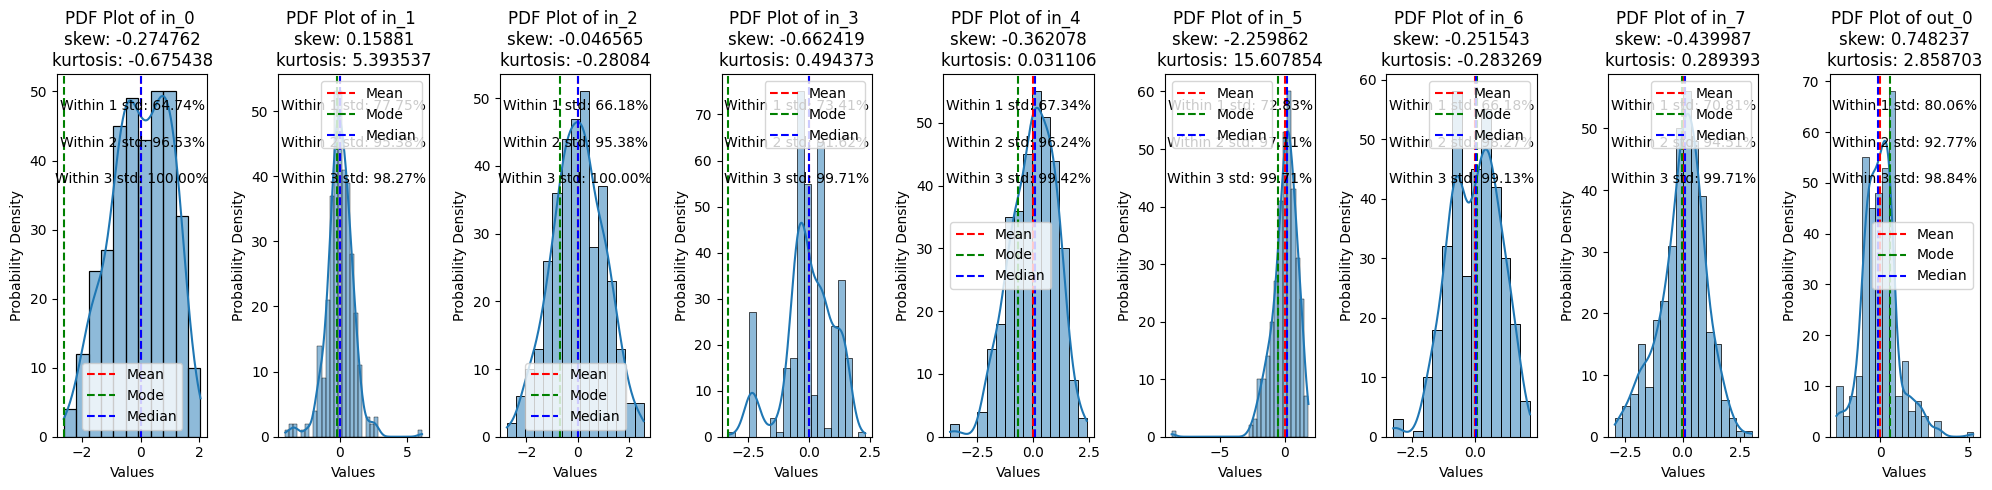

In [7]:
get_normal_distribution(df)

For data to be perfectly normally distributed the mean, median and mode needs to be all centered at 0. However, in the above distributions we could see that the both mean and median are close to each other which suggest that the data is approximately symmetrically distributed. The reason for the approximity can be caused by the mode which in most of the plots is at least one standard deviation away. the latter suggests that the data is potentially skewed or has multiple peaks or have kurtosis. Most of the predictors are unimodal except the in_0 which is a bimodal distribution. This would indicate that we have two distinctive subpopulation in within the data in n_0.


Leptokurtic distribution (positive kurtosis value indicating heavier tails): in_1, in_5, and in_0.

Platykurtic distribution (negative kurtosis value indicating thinner tails): out_0, in_3, in_6, and in_7 ,in_2 and in_4.

Such distribution would affect the estimation of the variables and we have when using models that assume the normality of distribution of the data. We could apply further normalization of the data using certain transformation (eg.BOX-cox), or use models that work with non-normal distributed data. However, since most of our data in all of our independent and dependent variable falls between 3 std is between [98%,100%], we could just remove those outliers with no harm. 

In [8]:
# Getting the outliers above 3 std
mean_values, standard_dev,dist_outliers = get_distribution_properties(df)
dist_outliers

lower_bound                                                               
            ID      in_0      in_1      in_2      in_3      in_4      in_5   
0          240 -0.633752 -4.073940 -0.980295 -2.334276 -2.001163 -0.179037  \
1          241 -0.422118 -3.490458 -0.788732 -2.332693 -1.288892  0.091538   
2          242 -0.362506 -3.665206 -0.490169 -2.211437 -1.640027  0.416586   
3          243 -0.432409 -3.242849 -1.253574 -2.307985 -2.053705  0.450381   
4          244  0.011578 -3.312155  0.655935 -2.346131 -1.705677  0.834993   
5          270  0.729849  1.313049 -0.371877 -3.297442 -2.007733 -8.731128   
6          115  0.417153 -0.795187 -0.278924 -0.125155 -3.318968 -1.614650   
7          116  0.692207 -0.400077 -0.994381 -0.228142 -3.690685 -2.384691   
8          270  0.729849  1.313049 -0.371877 -3.297442 -2.007733 -8.731128   
9           86  0.869751 -0.583711 -0.450722 -2.218148 -0.111838 -1.502476   
10         133 -0.104959 -0.373421 -0.047994  0.501058  0.615225  0.390589   
11         230  1.090887  0.611686  0.895219 -2.189942 -0.400208  1.284258   

                                 upper_bound                                 
        in_6      in_7     out_0          ID      in_0      in_1      in_2   
0   0.249700  0.050311  0.545978       239.0 -0.501539  6.134921 -0.628174  \
1  -0.077343 -0.111806  0.209243       123.0  2.039503 -0.226513  2.350177   
2   0.628014  0.029296 -0.127492        18.0  1.119236  1.529264  0.199808   
3   0.835931  0.797706  0.545978        58.0  1.317020 -0.556462 -0.811272   
4  -0.903750  1.436889 -0.127492       119.0 -0.600256 -0.732395 -0.087420   
5  -0.396398  1.730922  1.556183       164.0  0.193382  1.070771  1.151379   
6   0.557226 -0.610227  0.545978         NaN       NaN       NaN       NaN   
7   1.131827 -0.333969 -0.464227         NaN       NaN       NaN       NaN   
8  -0.396398  1.730922  1.556183         NaN       NaN       NaN       NaN   
9  -3.200739  0.053308 -1.811168         NaN       NaN       NaN       NaN   
10 -3.258381 -0.240894 -0.800962         NaN       NaN       NaN       NaN   
11 -3.071702  0.923748 -2.484638         NaN       NaN       NaN       NaN   

                                                                
        in_3      in_4      in_5      in_6      in_7     out_0  
0  -2.258455 -1.882958  0.156563 -0.166133  0.371507  0.209243  
1   0.507063 -0.095451  1.001233 -0.537065  3.005756 -0.800962  
2  -0.157597  1.043965  0.296989 -0.143379 -0.703291  3.239859  
3  -0.410130 -0.603443  0.374991 -0.582370  0.092332  3.239859  
4  -0.496158 -0.859189  1.245321 -0.604415 -0.126819  5.260269  
5  -0.010642  1.344934  0.977859 -1.220782 -0.009735  3.239859  
6        NaN       NaN       NaN       NaN       NaN       NaN  
7        NaN       NaN       NaN       NaN       NaN       NaN  
8        NaN       NaN       NaN       NaN       NaN       NaN  
9        NaN       NaN       NaN       NaN       NaN       NaN  
10       NaN       NaN       NaN       NaN       NaN       NaN  
11       NaN       NaN       NaN       NaN       NaN       NaN

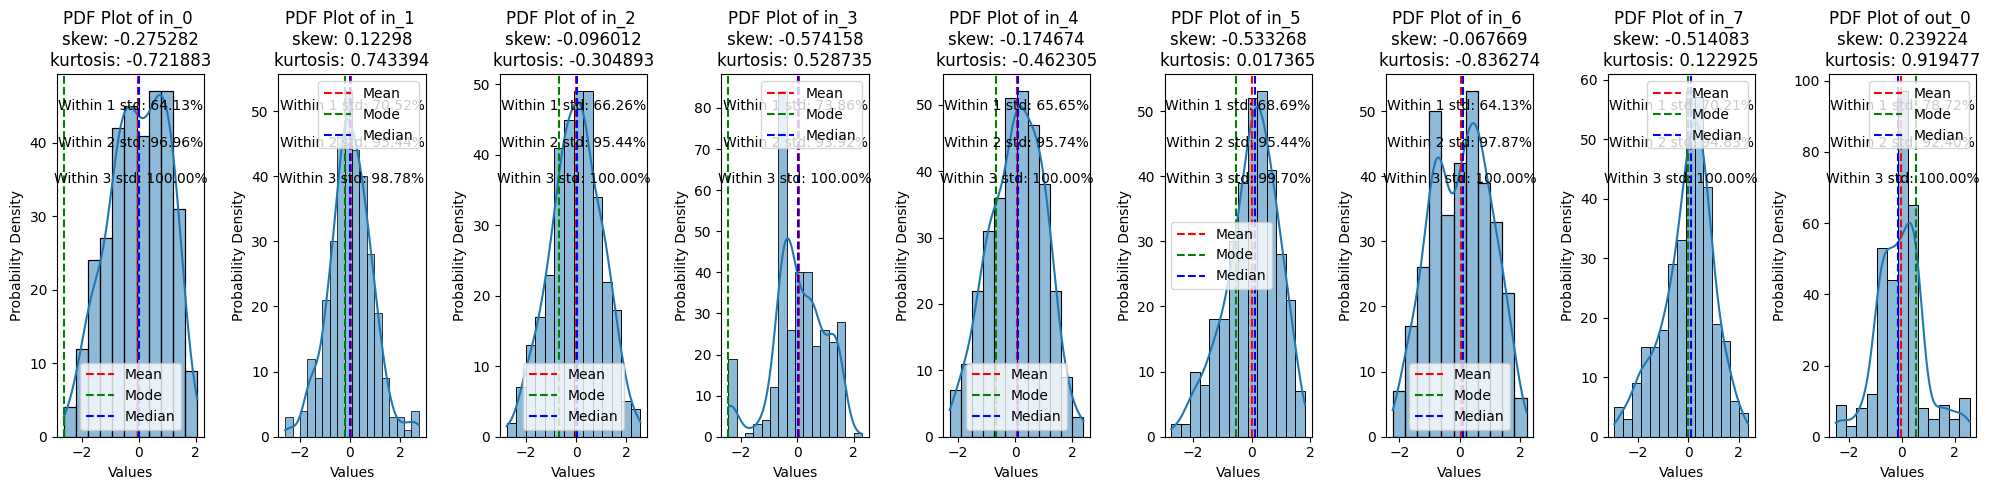

In [9]:
# Get the IDs of the outliers in the distribution
ids_to_remove = pd.concat((dist_outliers['lower_bound'],dist_outliers['upper_bound']),axis=0).dropna(axis=0)['ID'].unique()

# Remove rows from dist8outliers where the ID is in ids_to_remove 
cleaned_df1_inputs = df_input[~df_input['ID'].isin(ids_to_remove)]
cleaned_df1_output = df_output[~df_output['ID'].isin(ids_to_remove)]
df_cleaned_v1 = pd.concat([cleaned_df1_inputs,cleaned_df1_output.drop('ID', axis=1)], axis=1)
get_normal_distribution(df_cleaned_v1)

In [10]:
df_cleaned_v1.head()

,ID,in_0,in_1,in_2,in_3,in_4,in_5,in_6,in_7,out_0
0,0,1.375361,0.005695,0.340599,-0.068996,0.697063,0.424384,0.023075,-0.312951,0.209243
1,1,0.907906,0.631827,-0.247945,-0.186796,0.916347,-0.059345,0.157776,-1.222807,0.209243
2,2,0.305616,1.082619,-0.788736,-0.129107,0.988338,-0.384655,0.327061,-2.006789,-0.464227
3,3,1.060728,0.561928,-0.692963,-0.131504,1.115945,-0.134802,0.552675,-1.225815,0.209243
4,4,1.367719,0.954668,-0.171899,-0.221613,1.544429,0.317790,0.398558,-0.730315,0.209243


Boxplots of the data

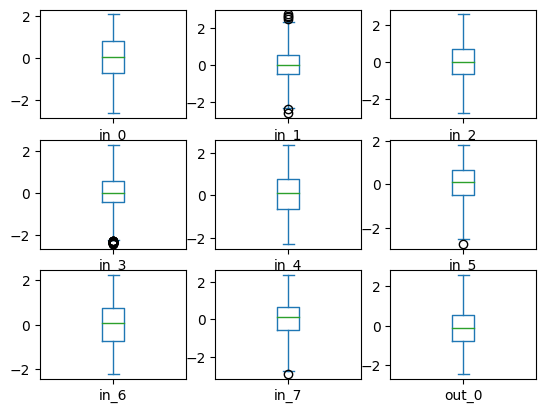

In [11]:
# Create boxplots of the cleaned data
df_cleaned_v1.drop('ID', axis=1).plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,whis=1.8)
plt.show()

In [12]:
# Get the outliers that shows near the whiskers
upper_bound,lower_bound,box_outliers= get_bounding_box_properties(cleaned_df1_inputs)
box_outliers.head()

,ID,in_0,in_1,in_2,in_3,in_4,in_5,in_6,in_7
31,NaN,NaN,2.756056,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,2.515555,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,2.670755,NaN,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,2.645876,NaN,NaN,NaN,NaN,NaN,NaN
245,NaN,NaN,-2.584136,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Clean the data captured outside the whiskers and do more cleaning of our data
df_cleaned_v2 = df_cleaned_v1[~df_cleaned_v1['ID'].isin(box_outliers.index)]
df_cleaned_v2.head()

,ID,in_0,in_1,in_2,in_3,in_4,in_5,in_6,in_7,out_0
0,0,1.375361,0.005695,0.340599,-0.068996,0.697063,0.424384,0.023075,-0.312951,0.209243
1,1,0.907906,0.631827,-0.247945,-0.186796,0.916347,-0.059345,0.157776,-1.222807,0.209243
2,2,0.305616,1.082619,-0.788736,-0.129107,0.988338,-0.384655,0.327061,-2.006789,-0.464227
3,3,1.060728,0.561928,-0.692963,-0.131504,1.115945,-0.134802,0.552675,-1.225815,0.209243
4,4,1.367719,0.954668,-0.171899,-0.221613,1.544429,0.317790,0.398558,-0.730315,0.209243


In [14]:
'''
   Notice we are cleaning the data outside 3 std of the normal distribution and storing them in df_cleaned_v1 
   We did extra cleaning by removing the data points outside the whiskers and stored them in df_cleaned_v2.

   Reason: We are not sure if the data outside the whiskers is an actual pattern of just outliers, so we will decide on that in the model evaluation phase.

'''
# Save our cleaned dataset
df_cleaned_v1.to_excel('../../data/cleaned_Ndist_v1.xlsx', index=False)
df_cleaned_v2.to_excel('../../data/cleaned_Bplot_v2.xlsx', index=False)

The box plots show that we are having having more outliers in our data namely in predictor in_1 and in_5 and in_3. With the first outlier removal we have decreased our dataset by 6% which is not significant. however, if we try to remove the ones that are highlighted by the bounding boxes, we would be looking at decreasing our dataset by roughly 16%.